---

_You are currently looking at **version 0.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the Jupyter Notebook FAQ course resource._

---

In [16]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `assets/fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [17]:
def answer_one():
    
    df = pd.read_csv("assets/fraud_data.csv")
    counts= np.bincount(df["Class"].values)
    percentage_frauds = counts[1]/(counts[0]+counts[1])
    
    return percentage_frauds


In [18]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score

    # Creation of dummy classifier and predictions
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)
    
    accuracy = dummy_majority.score(X_test, y_test)
    recall = recall_score(y_test, y_dummy_predictions)

    result = (accuracy, recall)

    return result

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    
    # Lets create classifier and train it
    svm = SVC().fit(X_train, y_train)
    # Lets make predictions with the classifier with not previously seen data in X_test
    y_svm_predictions = svm.predict(X_test)

    # Compute different scores
    accuracy = svm.score(X_test, y_test)
    recall = recall_score(y_test, y_svm_predictions)
    precision = precision_score(y_test, y_svm_predictions)

    result = (accuracy,recall, precision)

    return result

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [6]:
def answer_four():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    from sklearn.metrics import confusion_matrix
    
    # Lets create classifier and train it
    svm = SVC(C=1e9, gamma=1e-07).fit(X_train, y_train)
    # Lets make predictions with the classifier with not previously seen data in X_test
    y_svm_predictions = svm.predict(X_test)
    # Lets compute the decision function for each prediction inside y_svm_predictions
    y_svm_scores = svm.decision_function(X_test)
    
    # Lets make the confusion matrix choosing the threshold value of -200
    threshold = -220
    confusion = confusion_matrix(y_test, y_svm_scores>threshold)
    
    return confusion

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [20]:
def answer_five():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve
    import matplotlib.pyplot as plt 

    # Lets create and train a logistic classifier (max_iter=1000 was added to avoid getting an error)
    lr = LogisticRegression().fit(X_train, y_train)

    ### Lets compute predict_proba for X_test
    # As a result two probabilities are computed: the first column the prob. to be classified as 0, and the second one the prob.
    # to be classified as 1/fraud.
    y_proba_lr = lr.predict_proba(X_test)
    # We grab the probabilistic values of the second column because we want the probability of being a fraud
    y_proba_lr = y_proba_lr[:,1]
    
    ### Computes values for Precision-Recall and ROC curves:
    precision, recall, threshold = precision_recall_curve(y_test, y_proba_lr)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
    
    ### If we want to make a graph of the Precision-Recall and ROC curves
    
    def make_graph(fpr_lr, tpr_lr):
        # Initialise the subplot function using number of rows and columns
        figure, axis = plt.subplots(1, 2)

        # Precision-Recall curve
        axis[0].plot(precision, recall)
        axis[0].set_xlabel('Precision', fontsize=12)
        axis[0].set_ylabel('Recall', fontsize=12)
        axis[0].set_aspect('equal')
        axis[0].set_title('Precision-Recall Curve', fontsize=13)

        # ROC curve
        axis[1].plot(fpr_lr, tpr_lr)
        axis[1].plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
        axis[1].set_xlabel('False Positive Rate', fontsize=12)
        axis[1].set_ylabel('True Positive Rate', fontsize=12)
        axis[1].set_title('ROC curve)', fontsize=13)
        axis[1].set_aspect('equal')

        plt.suptitle('Graphs using predict_proba functions',fontsize=16)
        plt.tight_layout()

        plt.show()
    
    ### Comment / Uncomment the following line to see the curves
    make_graph(fpr_lr, tpr_lr)
    
    ### Computing Recall and Tpr in case you want a more specific number instead of watching the graphs
    # what is the recall when the precision is 0.75
    result_1 = recall[np.where(precision>=0.75)][0]
    
    # what is the true positive rate when the false positive rate is 0.16?
    # result_2 = tpr_lr[np.where(fpr_lr >=0.16)][0]
    
    # what is the true positive rate when the false positive rate is 0.61?
    result_2 = tpr_lr[np.where(fpr_lr >=0.61)][0]
    
    return (result_1, result_2)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation. (Suggest to use `solver='liblinear'`, more explanation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>

*This function should return a 4 by 2 numpy array with 8 floats.* 

*Note: do not return a DataFrame, just the values denoted by `?` in a numpy array.*

In [27]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    ## 1- Lets create the Logistic classifier
    clf = LogisticRegression(solver='liblinear')

    ## 2- Lets create the GridClassifierCV
    # Define the hyperparameters to test
    grid_values = {'penalty': ['l1', 'l2'],'C':[0.01, 0.1, 1, 10]}
    # Create the gridclassifier defining the grid_values to test, the metric to evaluate them and the nr. of crossfolds
    grid_clf_recall = GridSearchCV(clf, param_grid=grid_values, scoring="recall", cv=3)
    # Lets train the Gridclassifier
    grid_clf_recall.fit(X_train, y_train)
    
    # Lets extract all the recall mean scores corresponding to l1 and l2 from grid_clf_recall.cv_results_ 
    # and reshape them in two columns
    result = grid_clf_recall.cv_results_['mean_test_score'].reshape(-1,2)
    
    return result

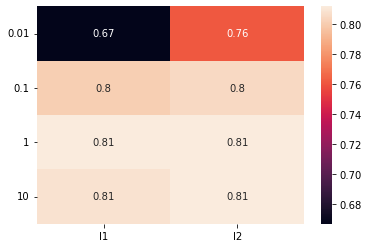

In [29]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10], annot=True)
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())